# <center>Bulding ANN Network

In [1]:
import tensorflow as tf
import numpy as np

## Upload data

In [2]:
%store -r X_train
%store -r X_test
%store -r y_train
%store -r y_test

In [3]:
X_train

array([[ 1.00150113, -0.57946723, -0.57638802, ...,  0.64920267,
         0.97481699,  1.36766974],
       [-0.99850112,  1.72572313, -0.57638802, ...,  0.64920267,
         0.97481699,  1.6612541 ],
       [-0.99850112, -0.57946723,  1.73494238, ...,  0.64920267,
        -1.02583358, -0.25280688],
       ...,
       [ 1.00150113, -0.57946723, -0.57638802, ..., -1.54035103,
        -1.02583358, -0.1427649 ],
       [ 1.00150113, -0.57946723, -0.57638802, ...,  0.64920267,
        -1.02583358, -0.05082558],
       [-0.99850112,  1.72572313, -0.57638802, ...,  0.64920267,
         0.97481699, -0.81456811]])

In [4]:
X_test

array([[-1.02020406,  1.73668197, -0.56349184, ..., -1.57810057,
        -1.0502616 , -0.99096946],
       [ 0.98019606, -0.57581067, -0.56349184, ...,  0.63367318,
         0.95214374,  0.8293793 ],
       [-1.02020406, -0.57581067,  1.77464858, ...,  0.63367318,
        -1.0502616 , -0.69904548],
       ...,
       [ 0.98019606, -0.57581067, -0.56349184, ...,  0.63367318,
        -1.0502616 , -1.13742992],
       [ 0.98019606, -0.57581067, -0.56349184, ...,  0.63367318,
        -1.0502616 , -0.38237688],
       [-1.02020406,  1.73668197, -0.56349184, ...,  0.63367318,
         0.95214374,  0.15573964]])

In [5]:
y_train

array([0, 0, 1, ..., 1, 1, 0])

In [6]:
y_test

array([0, 0, 0, ..., 1, 1, 1])

## ANN Network

### Initializing Network 

In [7]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [8]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [9]:
ann.add(tf.keras.layers.Dense(units=9, activation='relu'))

### Adding the third hidden layer

In [10]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [11]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training the ANN Network

### Compiling the ANN

In [14]:
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['binary_accuracy'])

### Training the ANN on the Training set

In [15]:
ann.fit(X_train, y_train, batch_size=32, epochs=100)

Epoch 1/100
250/250 [==============================] - 0s 373us/step - loss: 0.5215 - binary_accuracy: 0.7945
Epoch 2/100
250/250 [==============================] - 0s 348us/step - loss: 0.4651 - binary_accuracy: 0.7945
Epoch 3/100
250/250 [==============================] - 0s 350us/step - loss: 0.4419 - binary_accuracy: 0.7945
Epoch 4/100
250/250 [==============================] - 0s 347us/step - loss: 0.4269 - binary_accuracy: 0.7945
Epoch 5/100
250/250 [==============================] - 0s 348us/step - loss: 0.4156 - binary_accuracy: 0.7970
Epoch 6/100
250/250 [==============================] - 0s 347us/step - loss: 0.4063 - binary_accuracy: 0.8146
Epoch 7/100
250/250 [==============================] - 0s 347us/step - loss: 0.3953 - binary_accuracy: 0.8251
Epoch 8/100
250/250 [==============================] - 0s 343us/step - loss: 0.3831 - binary_accuracy: 0.8397
Epoch 9/100
250/250 [==============================] - 0s 344us/step - loss: 0.3731 - binary_accuracy: 0.8497
Epoch 10/1

## Predicting using ANN Network

In [16]:
y_pred = ann.predict(X_test)
y_pred

63/63 [==============================] - 0s 318us/step


array([[0.04582198],
       [0.01223273],
       [0.12537825],
       ...,
       [0.7144981 ],
       [0.17507209],
       [0.3619939 ]], dtype=float32)

In [17]:
y_pred = y_pred > 0.5
y_pred

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [False],
       [False]])

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)
cm

array([[1546,   61],
       [ 202,  191]])

<AxesSubplot: >

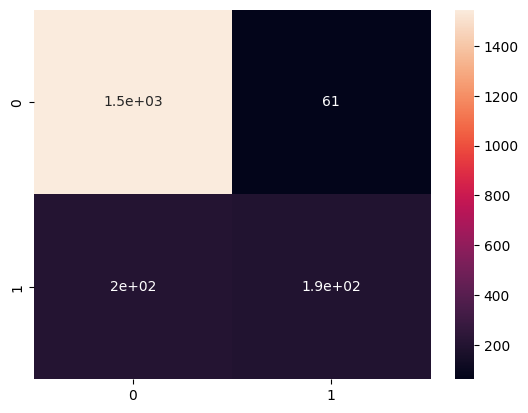

In [19]:
import seaborn as sns
sns.heatmap(cm, annot=True)

<AxesSubplot: >

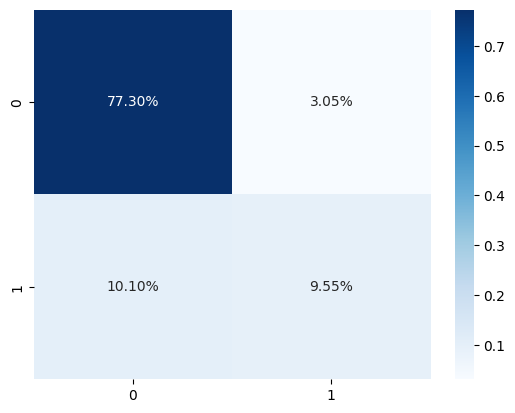

In [20]:
sns.heatmap(cm/np.sum(cm), annot=True, 
            fmt='.2%', cmap='Blues')

In [21]:
print(classification_report(y_test, y_pred, target_names=['stay', 'leave']))

              precision    recall  f1-score   support

        stay       0.88      0.96      0.92      1607
       leave       0.76      0.49      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.76      2000
weighted avg       0.86      0.87      0.86      2000

